In [20]:
import xarray as xr
import metpy

In [107]:
file = xr.open_dataset('../../GOES_Files/test_files/OR_ABI-L1b-RadC-M6C03_G17_s20210061801177_e20210061803550_c20210061803594.nc')
dat = file.metpy.parse_cf('Rad')
geos = dat.metpy.cartopy_crs
rad = dat.data

goes_extents = geos.x_limits + geos.y_limits
goes_params = geos.proj4_params

pc = ccrs.PlateCarree()
#pc_extents = [-124.50, -114.25, 32.50, 42.00]
pc_extents = [-124.50, -100, 20, 80]
pc_params = pc.proj4_params

target_rows = 2000
target_cols = 2000

In [108]:
goes_params

{'a': 6378137.0,
 'b': 6356752.31414,
 'rf': 298.2572221,
 'proj': 'geos',
 'lon_0': -137.0,
 'lat_0': 0.0,
 'h': 35786023.0,
 'x_0': 0,
 'y_0': 0,
 'units': 'm',
 'sweep': 'x'}

In [140]:
source_extents = (goes_extents[0],
                    goes_extents[2],
                    goes_extents[1],
                    goes_extents[3])
target_extents = (pc_extents[0],
                    pc_extents[2],
                    pc_extents[1],
                    pc_extents[3])

source_area = geometry.AreaDefinition('GOES-17','CONUS','original', 
                                        goes_params,
                                        rad.shape[1], rad.shape[0],
                                        source_extents)
# target_area = geometry.AreaDefinition('CA','Target Region','PC',
#                                         pc_params,
#                                         target_cols, target_rows,
#                                         target_extents)
target_area = geometry.AreaDefinition('CA','Target Region','PC',
                                        goes_params,
                                        rad.shape[1], rad.shape[0],
                                        source_extents)
#fix this ^^^

In [141]:
source_con_nn = image.ImageContainerNearest(rad, 
                                                source_area, 
                                                radius_of_influence=50000)
target_con_nn = source_con_nn.resample(target_area)
result = target_con_nn.image_data

np.save('../../GOES_Files/test_files/test', result)
file.close()

/sharedData2/nshakoor/.conda/envs/wildfireenv3/lib/python3.8/site-packages/pyresample/image.py:60: FutureWarning: Usage of ImageContainer is deprecated, please use NumpyResamplerBilinear class instead
  warnings.warn(
/sharedData2/nshakoor/.conda/envs/wildfireenv3/lib/python3.8/site-packages/pyresample/image.py:60: FutureWarning: Usage of ImageContainer is deprecated, please use NumpyResamplerBilinear class instead
  warnings.warn(


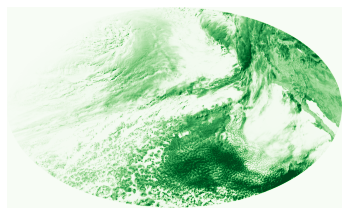

In [144]:
img_array = np.load("../../GOES_Files/test_files/test.npy")
img_array = np.clip(img_array, 0, 100)
plt.imshow(img_array, aspect='equal', cmap='Greens')
plt.axis('off')
plt.show()

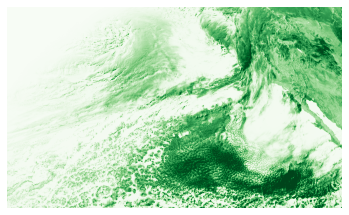

In [113]:
img_array = np.load("../../GOES_Files/test_files/test.npy")
img_array = np.clip(img_array, 0, 100)
plt.imshow(img_array, aspect='equal', cmap='Greens')
plt.axis('off')
plt.show()

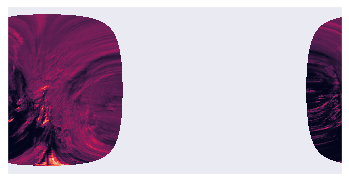

In [53]:
fig = plt.figure()
ax = fig.add_subplot(projection=pc)
ax.imshow(result, origin='upper',
          #extent=(x.min(), x.max(), y.min(), y.max()),
           transform=geos,
           interpolation='none')